In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [23]:
def r_squared(means, test):
    pearson_corr = np.corrcoef(test, means)
    r = pearson_corr[0, 1]
    return np.power(r, 2)

def read_pickle(fn):
    with open(fn, 'rb') as f:
        v = pickle.load(f)
    return v

def get_baseline(dataset1, dataset2, df):
    suffix = '_auc_overlap_mean'
    col1 = dataset1 + suffix
    col2 = dataset2 + suffix
    u = df[col1].to_numpy()
    v = df[col2].to_numpy()
    return r_squared(u, v)

In [32]:
def create_plot(dataset1, dataset2, df):
    lib = dataset1 + '_' + dataset2
    baseline = get_baseline(dataset1, dataset2, df)
    # compute results
    train_avg = read_pickle(BASE_DIR + '/' + lib + '/train_avg.pkl')
    test_avg = read_pickle(BASE_DIR + '/' + lib + '/test_avg.pkl')
    # plot w/ k = 1
    fig = plt.figure()
    x_axis = range(1, len(train_avg) + 1)
    plt.plot(x_axis, train_avg[:, 0], 'r-o', label='train')
    plt.plot(x_axis, test_avg[:, 0], 'b-+', label='test')
    plt.plot(x_axis, baseline * np.ones(len(x_axis)), 'c-', label='baseline')
    plt.ylabel('squared pearson correlation')
    plt.xlabel('dimension of transfer matrix')
    plt.legend(loc="lower right")
    title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point'
    plt.title(title)
    plt.savefig(lib + '_k=1.png', bbox_inches='tight')
    # plot w/ k = 2
    plt.clf()
    fig = plt.figure()
    x_axis = range(1, len(train_avg) + 1)
    plt.plot(x_axis, train_avg[:, 1], 'r-o', label='train')
    plt.plot(x_axis, test_avg[:, 1], 'b-+', label='test')
    plt.plot(x_axis, baseline * np.ones(len(x_axis)), 'c-', label='baseline')
    plt.ylabel('squared pearson correlation')
    plt.xlabel('dimension of transfer matrix')
    plt.legend(loc="lower right")
    title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 2, 10 seeds, ea w/ 50 model re-starts per data point'
    plt.title(title)
    plt.savefig(lib + '_k=2.png', bbox_inches='tight')

In [37]:
def new_create_plot(dataset1, dataset2, df):
    lib = dataset1 + '_' + dataset2
    baseline = get_baseline(dataset1, dataset2, df)
    # compute results
    train_avg = read_pickle(BASE_DIR + '/' + lib + '/train_avg.pkl')
    test_avg = read_pickle(BASE_DIR + '/' + lib + '/test_avg.pkl')
    # plot w/ k = 1
    fig = plt.figure()
    x_axis = range(1, len(train_avg) + 1)
    plt.plot(x_axis, train_avg[:, 0], 'r-o', label='train, r=1')
    plt.plot(x_axis, test_avg[:, 0], 'b-+', label='test, r=1')
    plt.plot(x_axis, train_avg[:, 1], 'm-o', label='train, r=2')
    plt.plot(x_axis, test_avg[:, 1], 'c-+', label='test, r=2')
    plt.plot(x_axis, baseline * np.ones(len(x_axis)), 'k-', label='baseline')
    plt.ylabel('squared pearson correlation')
    plt.xlabel('dimension of transfer matrix')
    plt.legend(loc="lower right")
    title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n 10 seeds, ea w/ 50 model re-starts per data point'
    plt.title(title)
    plt.savefig(lib + '_both.png', bbox_inches='tight')

In [33]:
# get baselines
df_fn = '../data/rep-gdsc-ctd2-mean.csv'
df = pd.read_csv(df_fn)
df.head()

,Drug.Name,ccle,drug_id,sample_id,REP_published_auc_mean,CTD2_published_auc_mean,GDSC_published_auc_mean,REP_auc_overlap_mean,CTD2_auc_overlap_mean,GDSC_auc_overlap_mean
0,MASITINIB,MFE296,0,0,2.225785,0.226895,0.580823,0.900162,0.569626,0.887739
1,MASITINIB,PSN1,0,1,2.508203,0.810219,0.281237,0.900162,0.741982,0.892772
2,MASITINIB,KYSE150,0,2,1.660618,0.849251,0.780547,0.900162,0.741082,0.834626
3,MASITINIB,ESS1,0,3,1.783359,0.570817,0.181374,0.900162,0.702013,0.709513
4,MASITINIB,A172,0,4,2.598827,0.834939,0.281237,0.900162,0.736365,0.894746


In [34]:
BASE_DIR = '../results/2023-07-24/transfer_multi_eval'

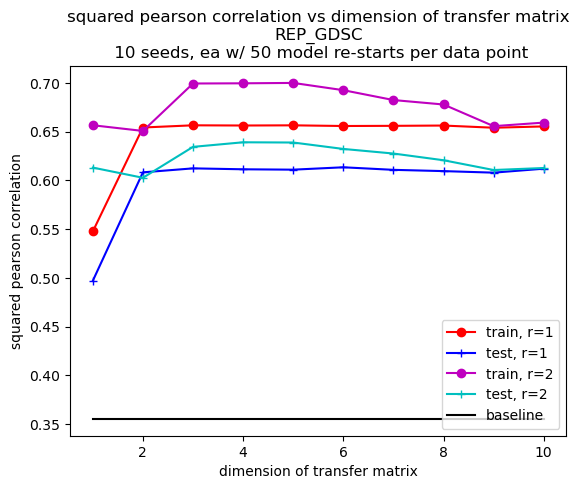

In [38]:
new_create_plot('REP', 'GDSC', df)

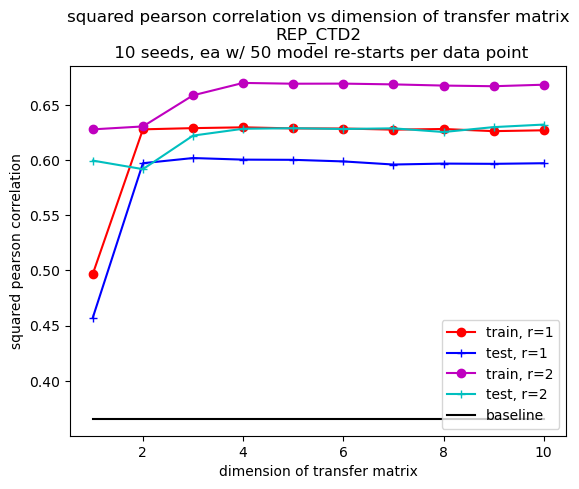

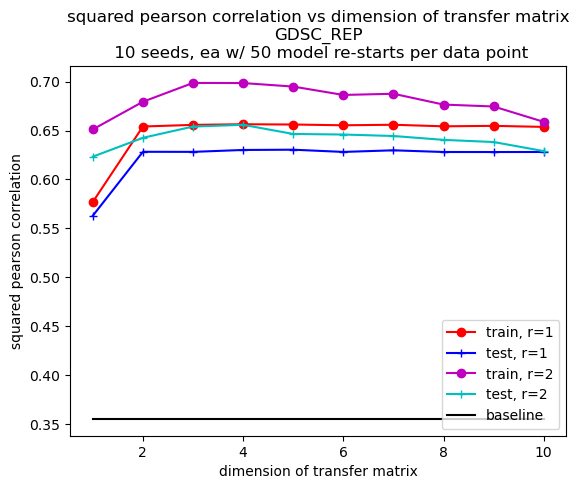

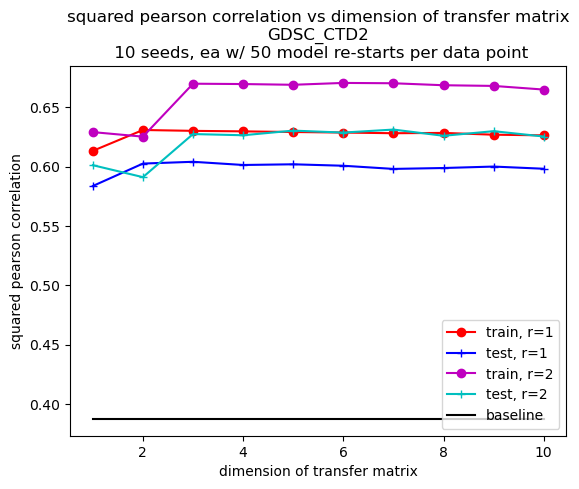

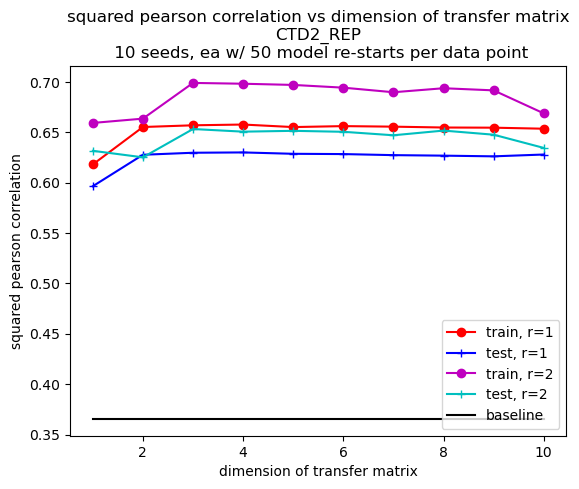

In [39]:
new_create_plot('REP', 'CTD2', df)
new_create_plot('GDSC', 'REP', df)
new_create_plot('GDSC', 'CTD2', df)
new_create_plot('CTD2', 'REP', df)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nREP_GDSC\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point')

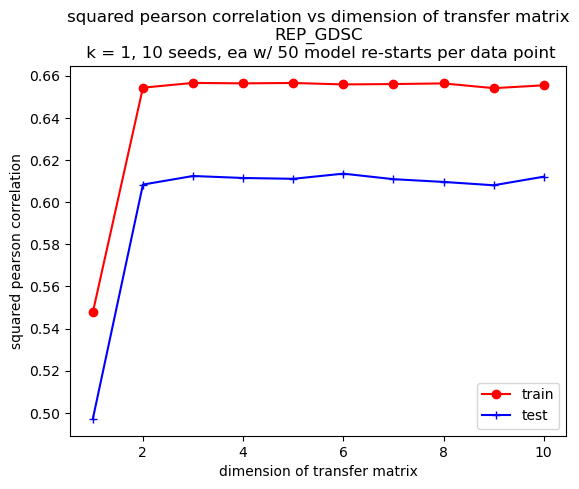

In [5]:
lib = 'REP_GDSC'
train_avg = read_pickle(BASE_DIR + '/' + lib + '/train_avg.pkl')
test_avg = read_pickle(BASE_DIR + '/' + lib + '/test_avg.pkl')
# plot
x_axis = range(1, len(train_avg) + 1)
plt.plot(x_axis, train_avg[:, 0], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 0], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nREP_GDSC\n k = 2, 10 runs per data point')

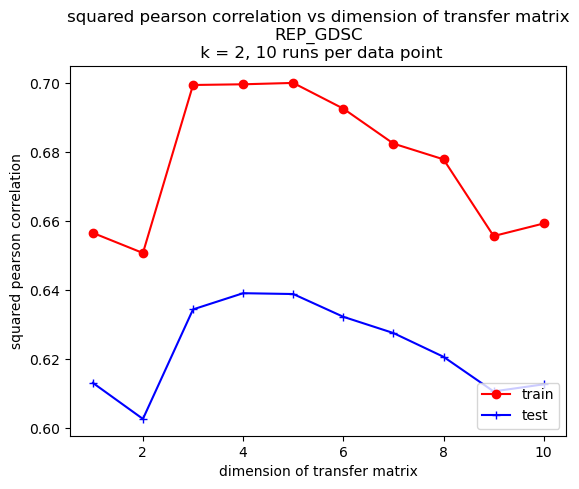

In [7]:
x_axis = range(1, len(train_avg) + 1)
plt.plot(x_axis, train_avg[:, 1], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 1], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 2, 10 runs per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nREP_CTD2\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point')

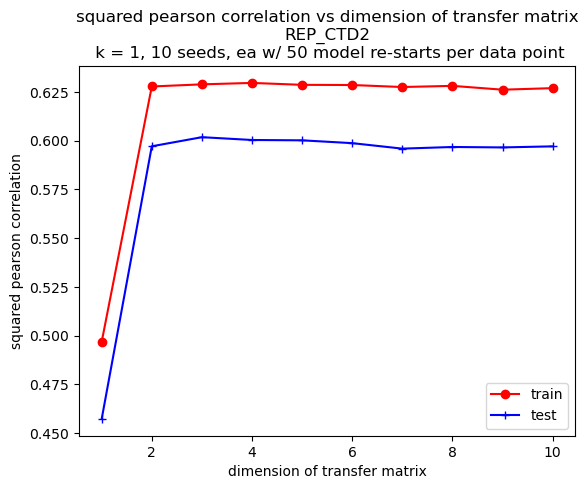

In [19]:
lib = 'REP_CTD2'
train_avg = read_pickle(BASE_DIR + '/' + lib + '/train_avg.pkl')
test_avg = read_pickle(BASE_DIR + '/' + lib + '/test_avg.pkl')
# plot
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 0], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 0], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nREP_CTD2\n k = 2, 10 runs per data point')

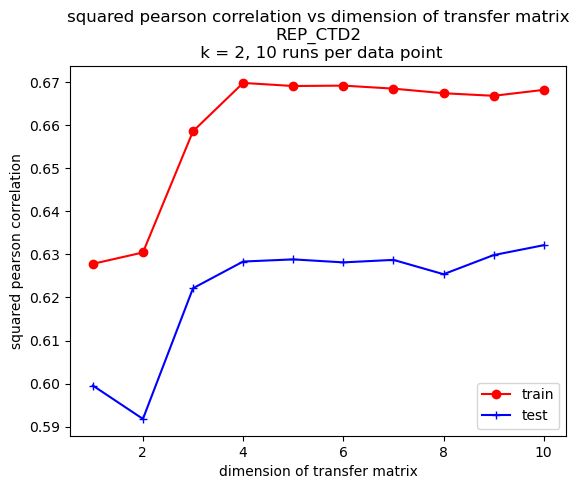

In [20]:
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 1], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 1], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 2, 10 runs per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nGDSC_CTD2\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point')

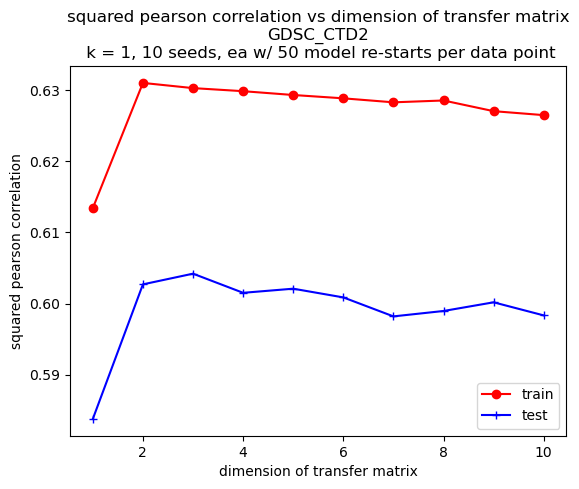

In [21]:
lib = 'GDSC_CTD2'
train_avg = read_pickle(BASE_DIR + '/' + lib + '/train_avg.pkl')
test_avg = read_pickle(BASE_DIR + '/' + lib + '/test_avg.pkl')
# plot
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 0], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 0], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nGDSC_CTD2\n k = 2, 10 runs per data point')

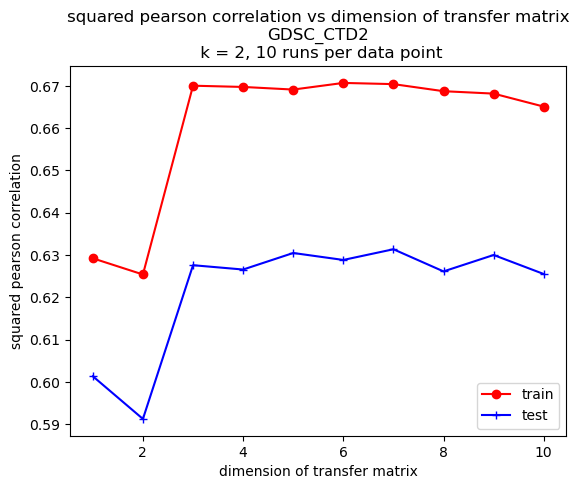

In [22]:
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 1], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 1], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 2, 10 runs per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nGDSC_REP\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point')

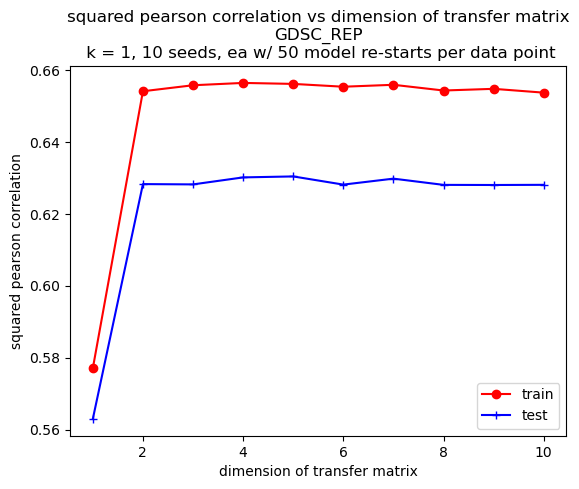

In [23]:
lib = 'GDSC_REP'
train_avg = read_pickle(BASE_DIR + '/' + lib + '/train_avg.pkl')
test_avg = read_pickle(BASE_DIR + '/' + lib + '/test_avg.pkl')
# plot
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 0], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 0], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nGDSC_REP\n k = 2, 10 runs per data point')

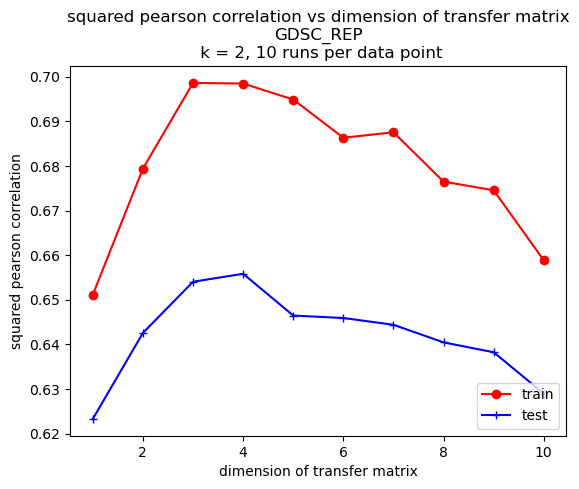

In [24]:
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 1], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 1], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 2, 10 runs per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nCTD2_REP\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point')

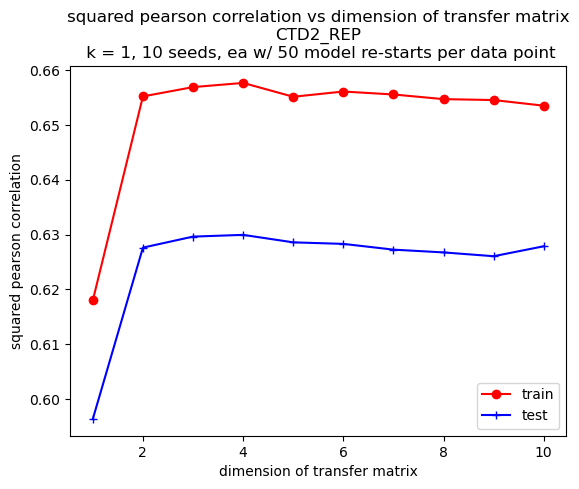

In [25]:
lib = 'CTD2_REP'
train_avg = read_pickle(BASE_DIR + '/' + lib + '/train_avg.pkl')
test_avg = read_pickle(BASE_DIR + '/' + lib + '/test_avg.pkl')
# plot
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 0], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 0], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 1, 10 seeds, ea w/ 50 model re-starts per data point'
plt.title(title)

Text(0.5, 1.0, 'squared pearson correlation vs dimension of transfer matrix\nCTD2_REP\n k = 2, 10 runs per data point')

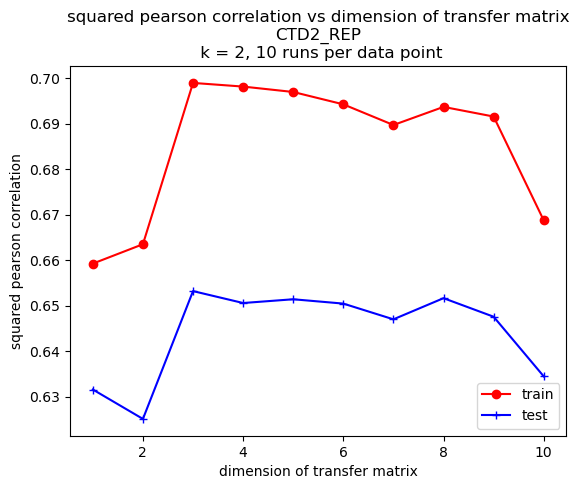

In [26]:
x_axis = range(1, len(train_arr) + 1)
plt.plot(x_axis, train_avg[:, 1], 'r-o', label='train')
plt.plot(x_axis, test_avg[:, 1], 'b-+', label='test')
plt.ylabel('squared pearson correlation')
plt.xlabel('dimension of transfer matrix')
plt.legend(loc="lower right")
title = 'squared pearson correlation vs dimension of transfer matrix\n' + lib + '\n k = 2, 10 runs per data point'
plt.title(title)

In [30]:
r = 2
k = 2
train_full[r-1, k-1, :, :]

array([[0.62745789, 0.59871924, 0.61458482, 0.60574367, 0.57709139],
       [0.54033891, 0.56938785, 0.59101939, 0.55379002, 0.58508487],
       [0.55016121, 0.54791076, 0.60966564, 0.62335914, 0.47835022],
       [0.56205137, 0.58014216, 0.61442056, 0.3133122 , 0.51754832],
       [0.38525646, 0.59957834, 0.6323197 , 0.60800755, 0.5342078 ],
       [0.59650665, 0.5815866 , 0.41937592, 0.51423492, 0.52686808],
       [0.63826393, 0.60491995, 0.55164211, 0.54622067, 0.51267641],
       [0.59785146, 0.59144532, 0.62681305, 0.50684805, 0.46673334],
       [0.60503104, 0.61099994, 0.64946302, 0.45863189, 0.50728472],
       [0.44692431, 0.65042088, 0.60292094, 0.62183969, 0.57781255]])

In [28]:
(.62 + .59 + .62 + .61 + .63 + .59 + .63 + .62 + .64 + .65) / 10
# 0 ... 2 ... 3 ... 2 ... 2 ... 0 ... 0 ... 2 ... 2 ... 1

0.62

In [31]:
r = 2
k = 2
test_full[r-1, k-1, :, :]

array([[0.56689583, 0.54165603, 0.55424602, 0.53988601, 0.51327127],
       [0.48974911, 0.48031968, 0.52740129, 0.47436703, 0.51396863],
       [0.52640606, 0.51496396, 0.57140923, 0.58485969, 0.43897845],
       [0.54518784, 0.54467753, 0.58254921, 0.31611651, 0.4374106 ],
       [0.34292906, 0.55739909, 0.59751906, 0.57471169, 0.51490233],
       [0.55421002, 0.55823172, 0.39065273, 0.48235369, 0.47630336],
       [0.58735148, 0.58160053, 0.50388354, 0.50021523, 0.47022471],
       [0.57424951, 0.56282331, 0.61324345, 0.49079713, 0.46720373],
       [0.52886891, 0.55532893, 0.57305411, 0.38286868, 0.40180705],
       [0.39639679, 0.59382212, 0.57453566, 0.57522409, 0.5415693 ]])